In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# download SF crime data
# download('https://drive.google.com/open?id=1GVjpKTcXq7FTuJLLWMI8NA_NZBeB47_Z', '~/Downloads')
crime_file = 'SF_Police_Department_Incidents.csv'
file_path = os.path.join('~', 'Downloads', crime_file)
min_wage_file = 'min_wages.csv'

In [3]:
# create DataFrame with crime_file
crime_df = pd.read_csv(file_path)
crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,170513602,WARRANTS,WARRANT ARREST,Friday,06/23/2017,16:00,TARAVAL,"ARREST, BOOKED",2500 Block of 44TH AV,-122.502210,37.739058,"(37.739058349527, -122.502210350969)",17051360263010
1,170817802,OTHER OFFENSES,TRAFFIC VIOLATION,Saturday,10/07/2017,00:57,MISSION,"ARREST, BOOKED",20TH ST / CAPP ST,-122.417964,37.758697,"(37.758696816649, -122.41796448376)",17081780265015
2,170820275,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Saturday,10/07/2017,22:24,NORTHERN,NONE,300 Block of GROVE ST,-122.422348,37.777862,"(37.77786177597, -122.422348143857)",17082027564085
3,130596143,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,07/20/2013,00:52,MISSION,NONE,500 Block of VALENCIA ST,-122.421739,37.764097,"(37.764097222902, -122.421738508476)",13059614328150
4,130634072,FRAUD,"CREDIT CARD, THEFT OF",Thursday,07/18/2013,17:45,CENTRAL,"ARREST, BOOKED",600 Block of POST ST,-122.413056,37.787645,"(37.787645311178, -122.413056449036)",13063407209310


In [4]:
crime_categories = crime_df['Category'].value_counts()
crime_categories

LARCENY/THEFT                  460588
OTHER OFFENSES                 301689
NON-CRIMINAL                   230964
ASSAULT                        188617
VEHICLE THEFT                  124616
DRUG/NARCOTIC                  117760
VANDALISM                      112247
WARRANTS                        99126
BURGLARY                        88662
SUSPICIOUS OCC                  78101
MISSING PERSON                  63116
ROBBERY                         54425
FRAUD                           40419
SECONDARY CODES                 24983
FORGERY/COUNTERFEITING          22779
WEAPON LAWS                     21402
TRESPASS                        18791
PROSTITUTION                    16608
STOLEN PROPERTY                 11541
SEX OFFENSES, FORCIBLE          11274
DISORDERLY CONDUCT               9916
DRUNKENNESS                      9699
RECOVERED VEHICLE                8645
DRIVING UNDER THE INFLUENCE      5547
KIDNAPPING                       5254
RUNAWAY                          4330
LIQUOR LAWS 

In [5]:
# convert date to year
def date_conversion(date_string):
    
    converted = datetime.strptime(date_string, '%m/%d/%Y').date()
    converted = converted.year
    return converted

crime_df['Date'] = crime_df['Date'].map(lambda x: date_conversion(x))
crime_df
crime_df.head()    

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,170513602,WARRANTS,WARRANT ARREST,Friday,2017,16:00,TARAVAL,"ARREST, BOOKED",2500 Block of 44TH AV,-122.502210,37.739058,"(37.739058349527, -122.502210350969)",17051360263010
1,170817802,OTHER OFFENSES,TRAFFIC VIOLATION,Saturday,2017,00:57,MISSION,"ARREST, BOOKED",20TH ST / CAPP ST,-122.417964,37.758697,"(37.758696816649, -122.41796448376)",17081780265015
2,170820275,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Saturday,2017,22:24,NORTHERN,NONE,300 Block of GROVE ST,-122.422348,37.777862,"(37.77786177597, -122.422348143857)",17082027564085
3,130596143,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2013,00:52,MISSION,NONE,500 Block of VALENCIA ST,-122.421739,37.764097,"(37.764097222902, -122.421738508476)",13059614328150
4,130634072,FRAUD,"CREDIT CARD, THEFT OF",Thursday,2013,17:45,CENTRAL,"ARREST, BOOKED",600 Block of POST ST,-122.413056,37.787645,"(37.787645311178, -122.413056449036)",13063407209310


In [6]:
# select categories to analyze
analysis_categories = crime_df.loc[(crime_df['Category']=='VEHICLE THEFT') |
                                   (crime_df['Category']=='LARCENY/THEFT') |
                                   (crime_df['Category']=='ASSAULT') |
                                   (crime_df['Category']=='DRUG/NARCOTIC'), ['Category', 'Date', 'IncidntNum']]
print(f'{len(analysis_categories)} Incidents')

analysis_categories = analysis_categories.rename(columns={'Date': 'Year'})
analysis_categories.head()

891581 Incidents


,Category,Year,IncidntNum
10,VEHICLE THEFT,2013,130633096
11,VEHICLE THEFT,2017,170824380
12,LARCENY/THEFT,2011,110273684
15,ASSAULT,2014,140995955
22,LARCENY/THEFT,2014,140815187


In [7]:
# retrive annual total by year
annual_total = analysis_categories.groupby('Year')
annual_total = annual_total['IncidntNum'].count()

annual_total_dict = {
    'Total_Incidents': annual_total,
    'Crime_Percent_Change': annual_total.pct_change()
}

annual_total_df = pd.DataFrame(annual_total_dict)
annual_total_df = annual_total_df.reset_index()
annual_total_df.to_csv('annual_crime_totals.csv')

annual_total_df

,Year,Crime_Percent_Change,Total_Incidents
0,2003,NaN,65096
1,2004,0.001367,65185
2,2005,-0.023594,63647
3,2006,-0.117617,56161
4,2007,-0.015188,55308
5,2008,0.015929,56189
6,2009,-0.021125,55002
7,2010,-0.083961,50384
8,2011,-0.009983,49881
9,2012,0.118342,55784


In [8]:
# create dataframe with min wage file
min_wage_df = pd.read_csv(min_wage_file)

annual_total_w_min_wage = pd.merge(annual_total_df, min_wage_df, how='outer')
annual_total_w_min_wage['Min_Wage_Percent_Change'] = annual_total_w_min_wage['Minimum Wage SF'].pct_change()
annual_total_w_min_wage

,Year,Crime_Percent_Change,Total_Incidents,Minimum Wage SF,Minimum Wage SD,Min_Wage_Percent_Change
0,2003,NaN,65096,NaN,NaN,NaN
1,2004,0.001367,65185,8.50,9.00,NaN
2,2005,-0.023594,63647,8.62,9.00,0.014118
3,2006,-0.117617,56161,8.82,9.00,0.023202
4,2007,-0.015188,55308,9.14,9.00,0.036281
5,2008,0.015929,56189,9.36,9.00,0.024070
6,2009,-0.021125,55002,9.79,9.00,0.045940
7,2010,-0.083961,50384,9.79,9.00,0.000000
8,2011,-0.009983,49881,9.92,9.00,0.013279
9,2012,0.118342,55784,10.24,9.00,0.032258


In [9]:
# select data for plotting
plot_data = annual_total_w_min_wage[['Year', 'Crime_Percent_Change', 'Min_Wage_Percent_Change']]
plot_data = plot_data.loc[(plot_data['Year'] >= 2005) &
                          (plot_data['Year'] <= 2016)]

plot_data = plot_data.set_index('Year')
plot_data.to_csv('pct_change_comparison.csv')
plot_data

,Crime_Percent_Change,Min_Wage_Percent_Change
Year,,
2005,-0.023594,0.014118
2006,-0.117617,0.023202
2007,-0.015188,0.036281
2008,0.015929,0.024070
2009,-0.021125,0.045940
2010,-0.083961,0.000000
2011,-0.009983,0.013279
2012,0.118342,0.032258
2013,0.111573,0.030273


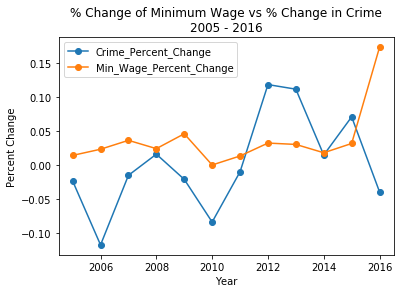

In [11]:
# plot % change of crime v % change in min wage 
x_vals = np.arange(2005, 2017)

plot_data.plot(marker='o')

plt.title('% Change of Minimum Wage vs % Change in Crime\n2005 - 2016')
plt.ylabel('Percent Change')
plt.xlim(2004.5, 2016.5)

plt.savefig('pct_change.png')
plt.show()

In [42]:
# plot min wage v crime
plot_data_2 = annual_total_w_min_wage[['Year', 'Total_Incidents', 'Minimum Wage SF']]
plot_data_2 = plot_data_2.loc[(plot_data_2['Year'] >= 2004)]
plot_data_2 = plot_data_2.set_index('Year')

plot_data_2.to_csv('min_wage_v_crime.csv')
plot_data_2

,Total_Incidents,Minimum Wage SF
Year,,
2004,65185,8.50
2005,63647,8.62
2006,56161,8.82
2007,55308,9.14
2008,56189,9.36
2009,55002,9.79
2010,50384,9.79
2011,49881,9.92
2012,55784,10.24


1139.45406241


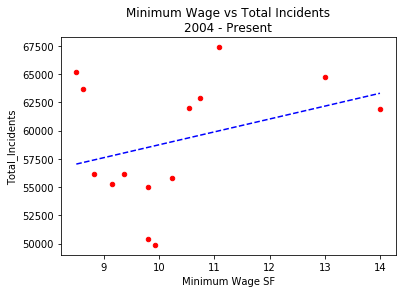

In [46]:
# plot min wage v crime
min_wage = plot_data_2['Minimum Wage SF']
total_incidents = plot_data_2['Total_Incidents']

slope, intercept, r_value, p_value, _ = stats.linregress(min_wage, total_incidents)
print(slope)
fit_line = slope * min_wage + intercept

plot_data_2.plot.scatter('Minimum Wage SF', 'Total_Incidents', color='r')
plt.plot(min_wage, fit_line, 'b--')
plt.title('Minimum Wage vs Total Incidents\n2004 - Present')


plt.savefig('min_v_crime.png')
plt.show()

In [33]:
grouped_categories = analysis_categories.groupby(['Year', 'Category'])
grouped_categories = grouped_categories['IncidntNum'].count()
grouped_categories = grouped_categories.reset_index()
grouped_categories = grouped_categories.pivot(index='Year', columns='Category', values='IncidntNum')

grouped_categories.to_csv('total_crimes_by_category.csv')

grouped_categories

Category,ASSAULT,DRUG/NARCOTIC,LARCENY/THEFT,VEHICLE THEFT
Year,,,,
2003,13461,9917,26393,15325
2004,12899,9897,24505,17884
2005,11601,8533,25319,18194
2006,12449,9069,27352,7291
2007,12518,10560,25770,6460
2008,12681,11648,25807,6053
2009,12284,11950,25585,5183
2010,12387,9205,24446,4346
2011,12279,6935,25905,4762
